#Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving crime_data.csv to crime_data.csv


In [ ]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OrdinalEncoder
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import pandas as pd
# Read the Excel file
df = pd.read_csv('crime_data.csv')
# Display the first few rows of the dataset
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# EDA

In [ ]:
# Display the first few rows of the dataset
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
# Summary statistics of the numerical columns
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [ ]:
df.describe(include=object)

,Unnamed: 0
count,50
unique,50
top,Alabama
freq,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
# to drop year column permanently
df.drop(columns=['Year'], inplace=True)
df

In [ ]:
df.shape

(50, 5)

In [ ]:
#finding duplicates
df.duplicated().sum()

0

In [ ]:
#finding missing values
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

# encodeng -coverting object data in to numeric column

#Analysing data

Text(0.5, 1.0, 'Correlation Map')

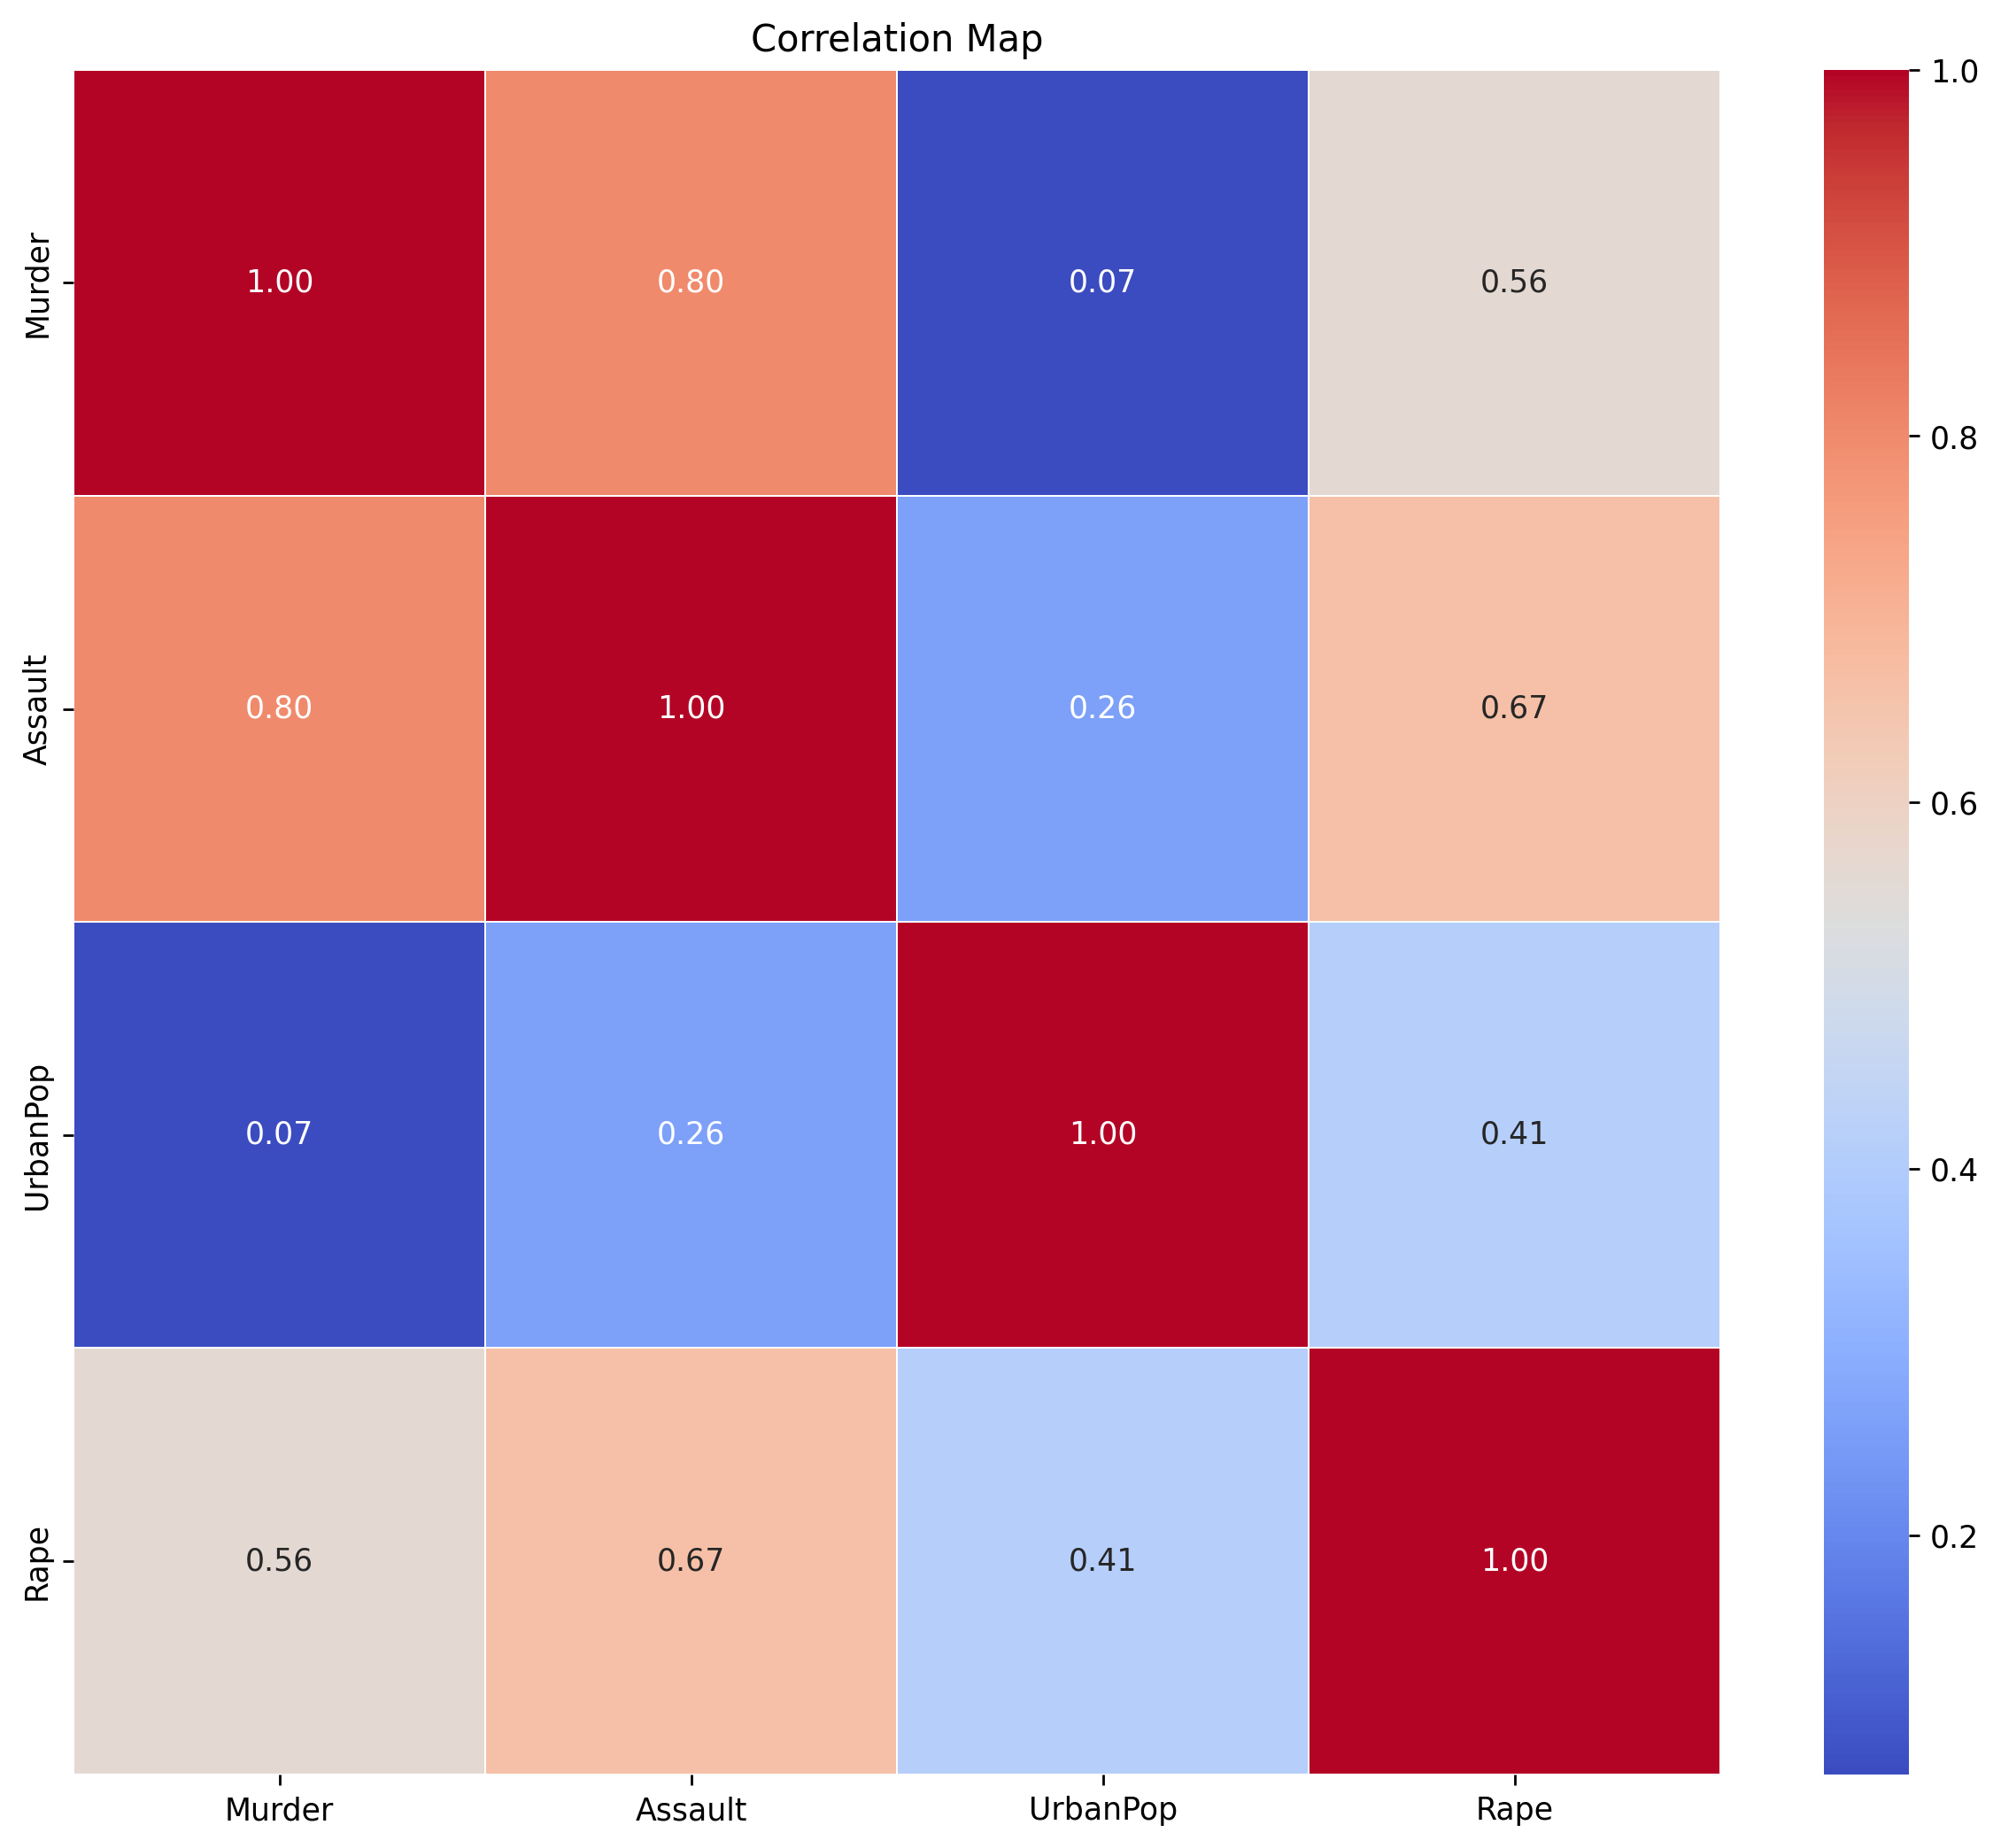

In [ ]:
# Assuming df is your DataFrame containing numerical columns
s = df.select_dtypes(include="number").corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# Create a heatmap with a diverging color map and display the correlation coefficients
sns.heatmap(s, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
# Add a title
plt.title("Correlation Map")

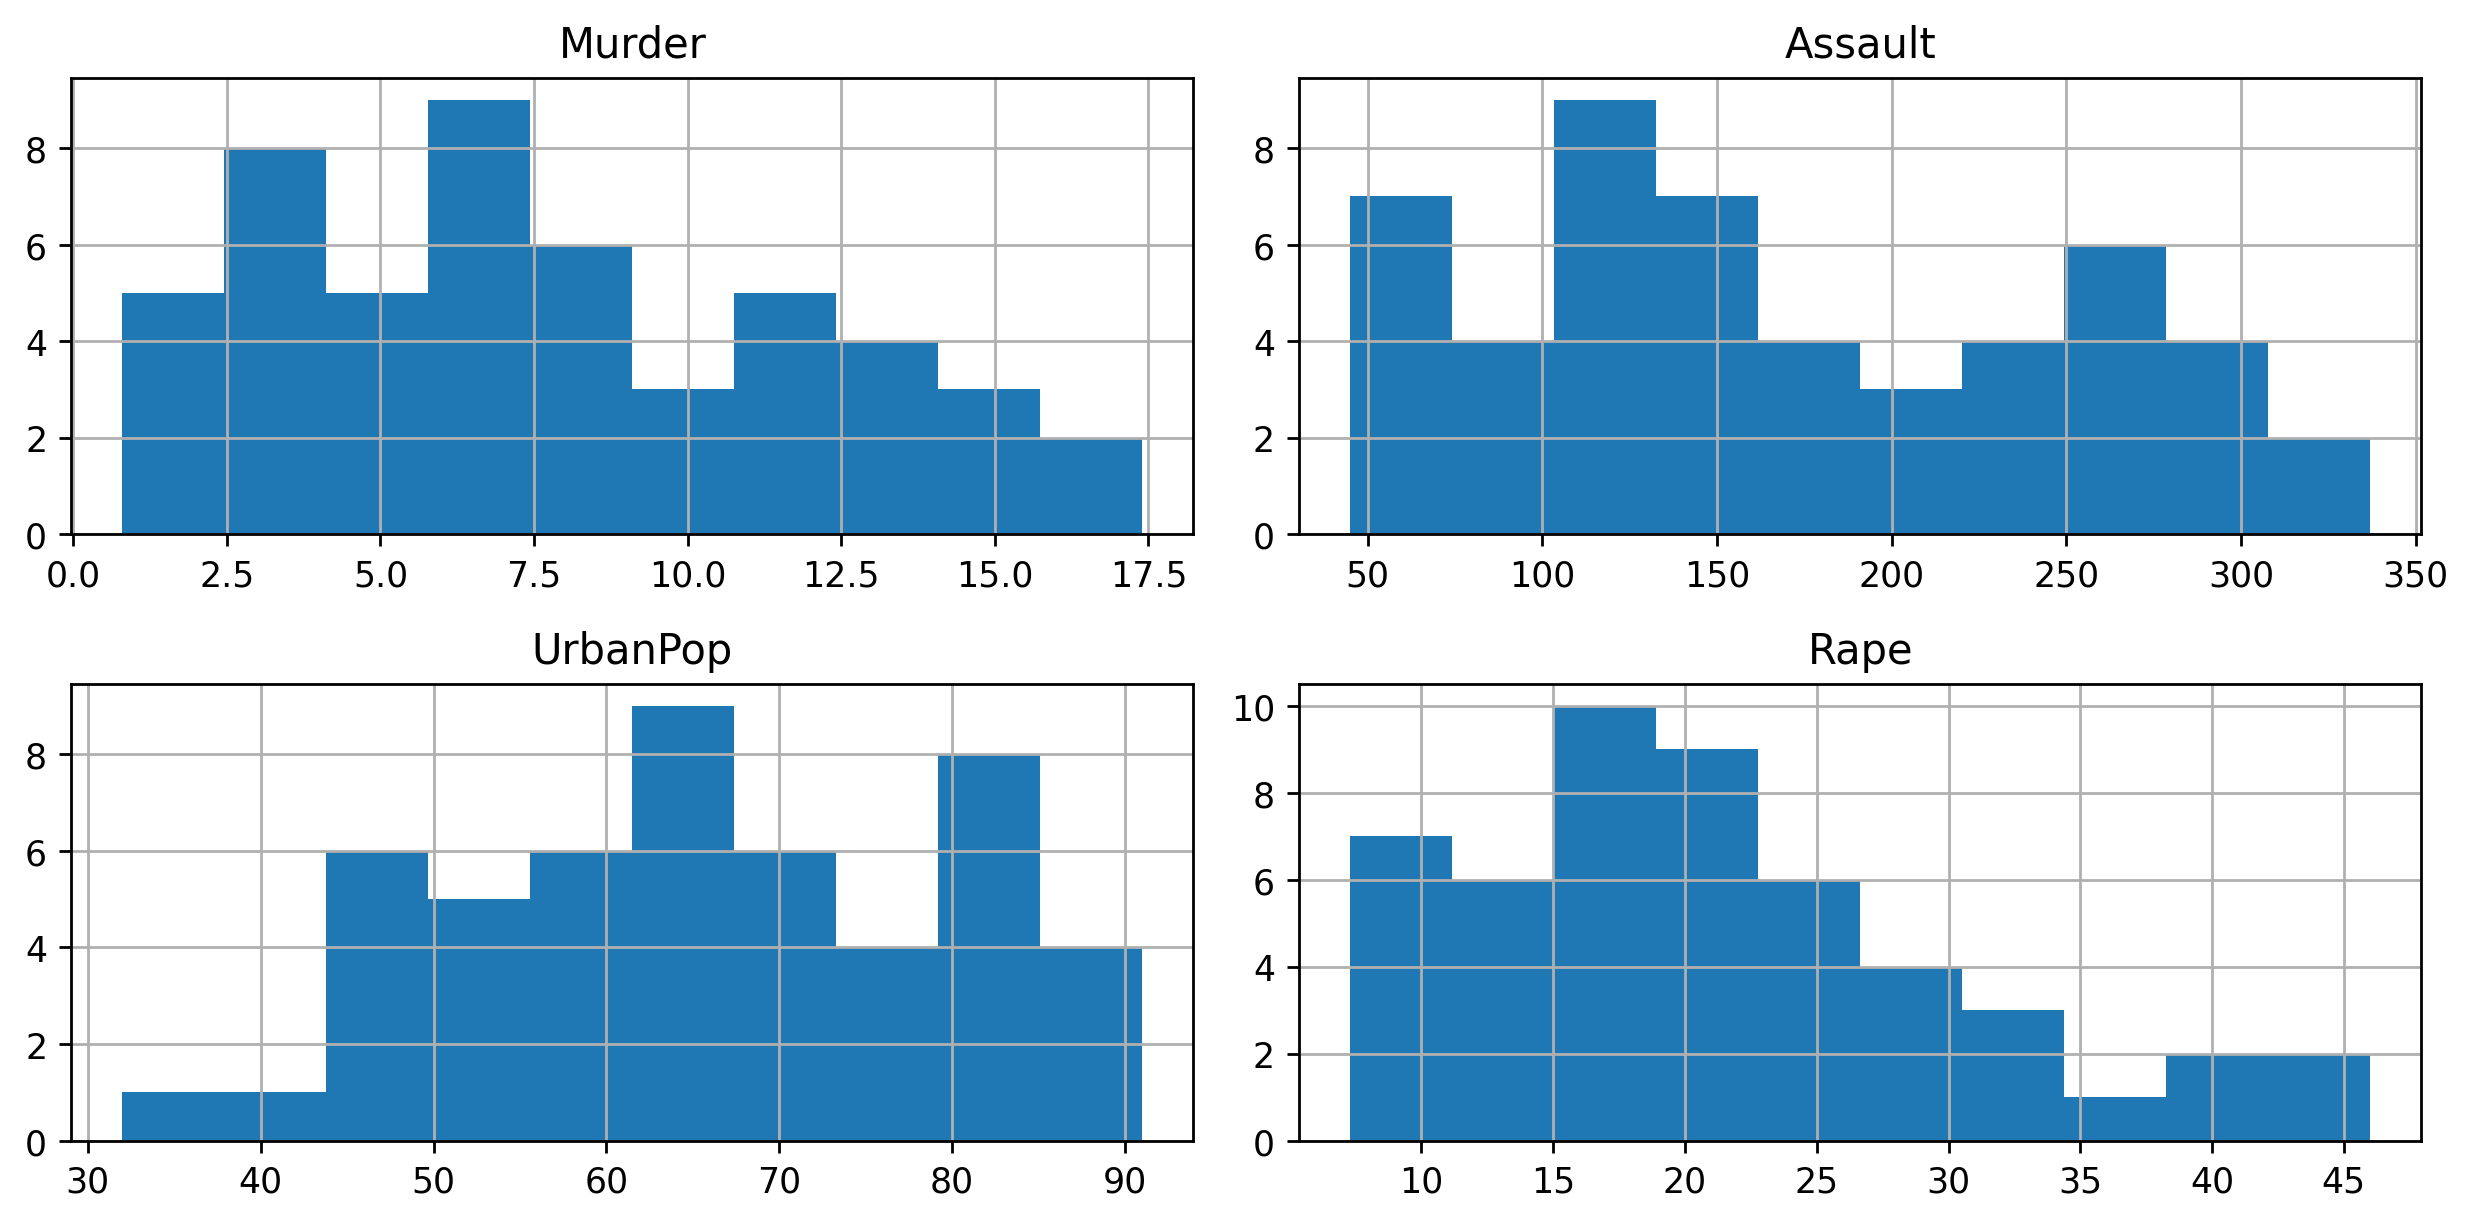

In [ ]:
df.hist()
plt.tight_layout()

In [ ]:
#scatterplot to understand relatinship

In [ ]:
variables_to_plot =['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

In [ ]:
# Loop through the list and create scatterplots
for i in variables_to_plot:
    sns.scatterplot(data=df, x=i, y='Type')
    plt.title(f'Scatterplot of {i} vs Type')
    plt.show()

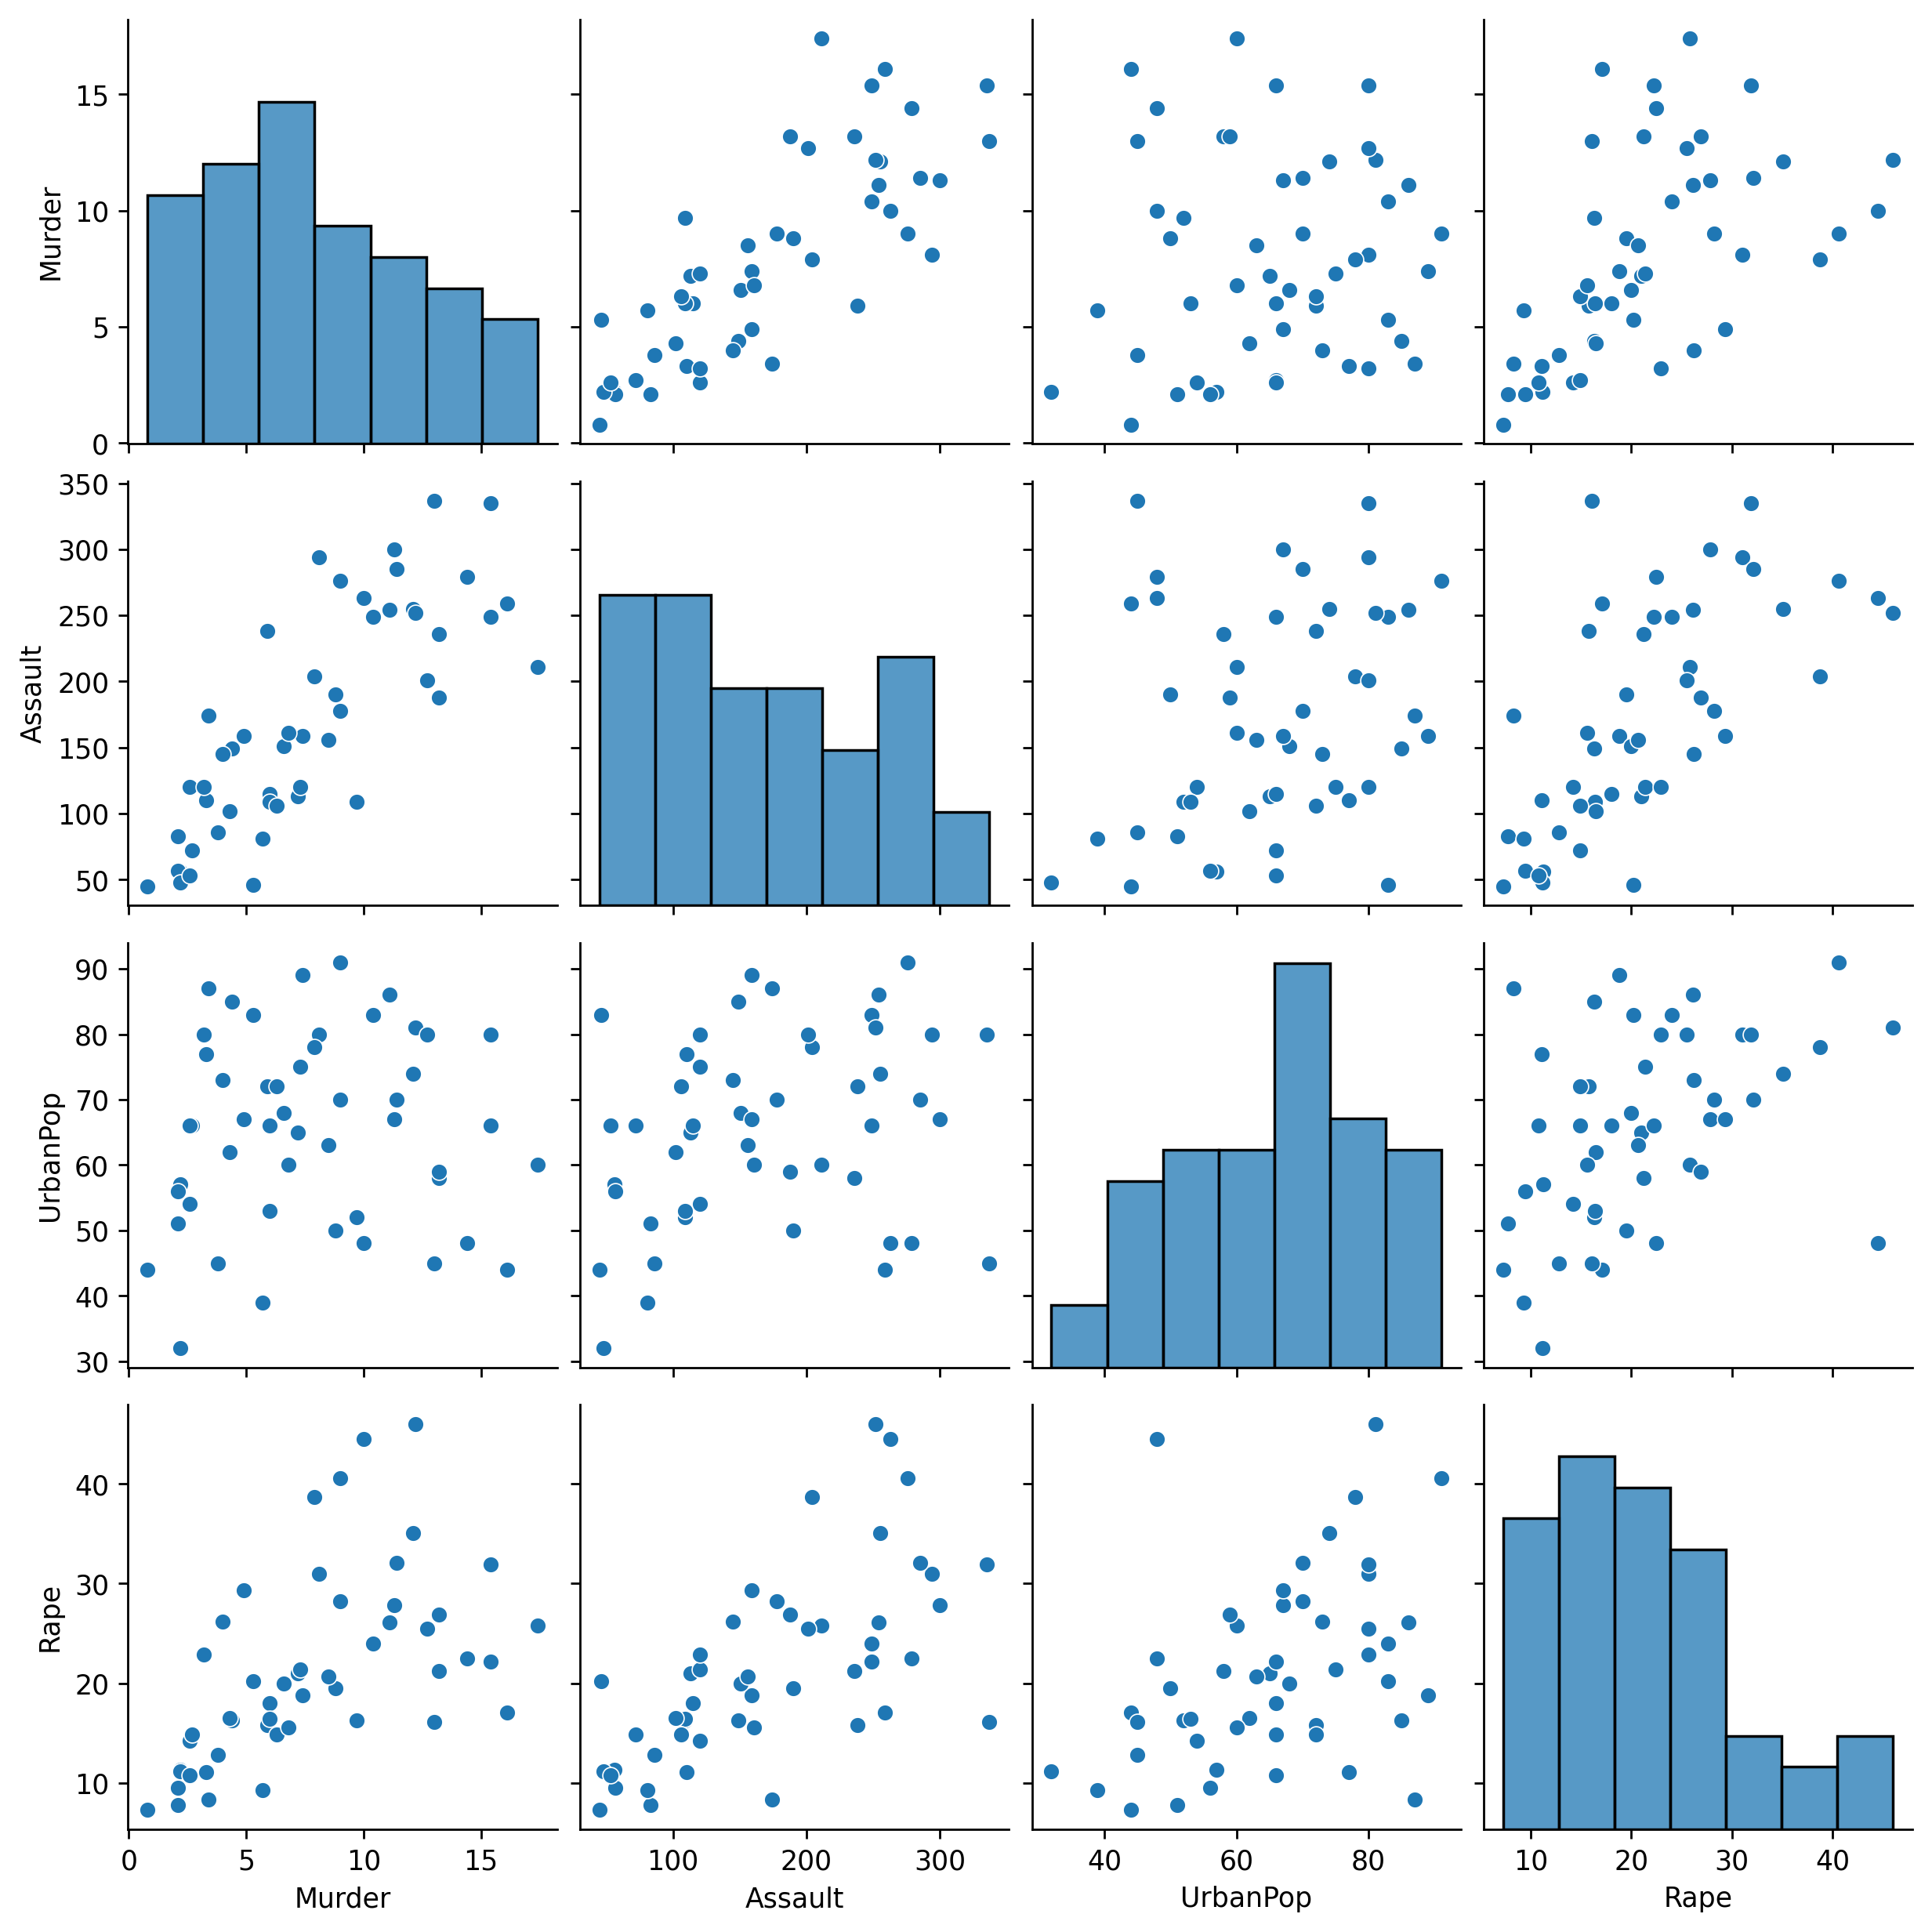

In [ ]:
sns.pairplot(df)

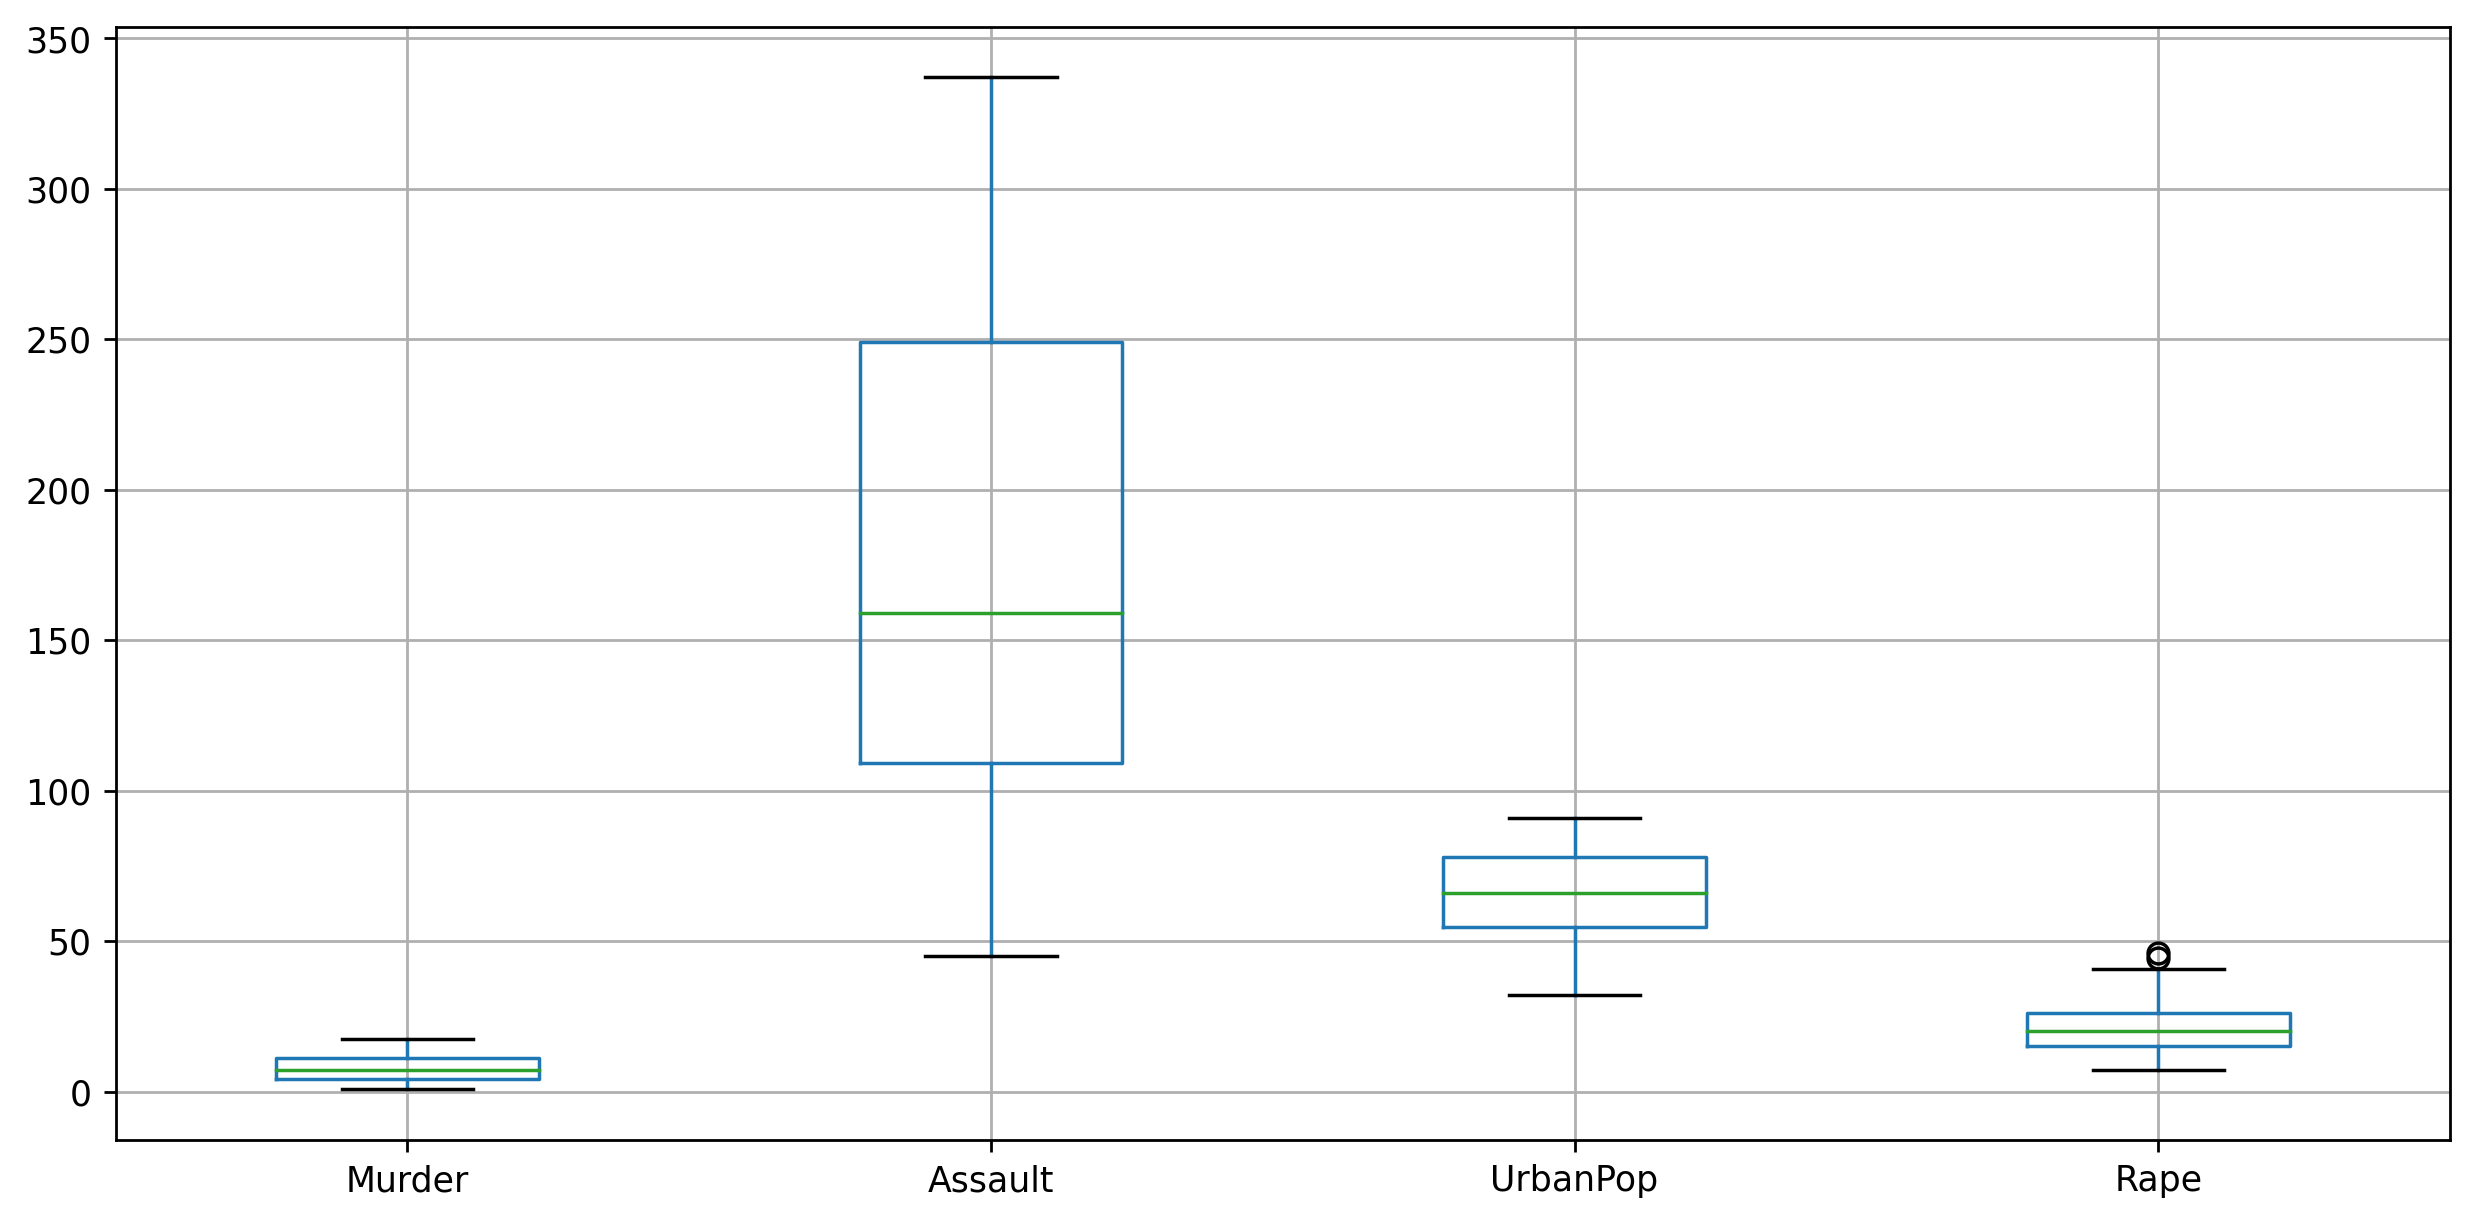

In [ ]:
df.boxplot()
plt.tight_layout()

# for delete outliers

In [ ]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [ ]:
import numpy as np
def calculate_whisker(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

# Loop through the list and replace outliers
for i in ['Rape']:
    lw, uw = calculate_whisker(df[i])
    df[i] = np.where(df[i] < lw, lw, df[i])
    df[i] = np.where(df[i] > uw, uw, df[i])

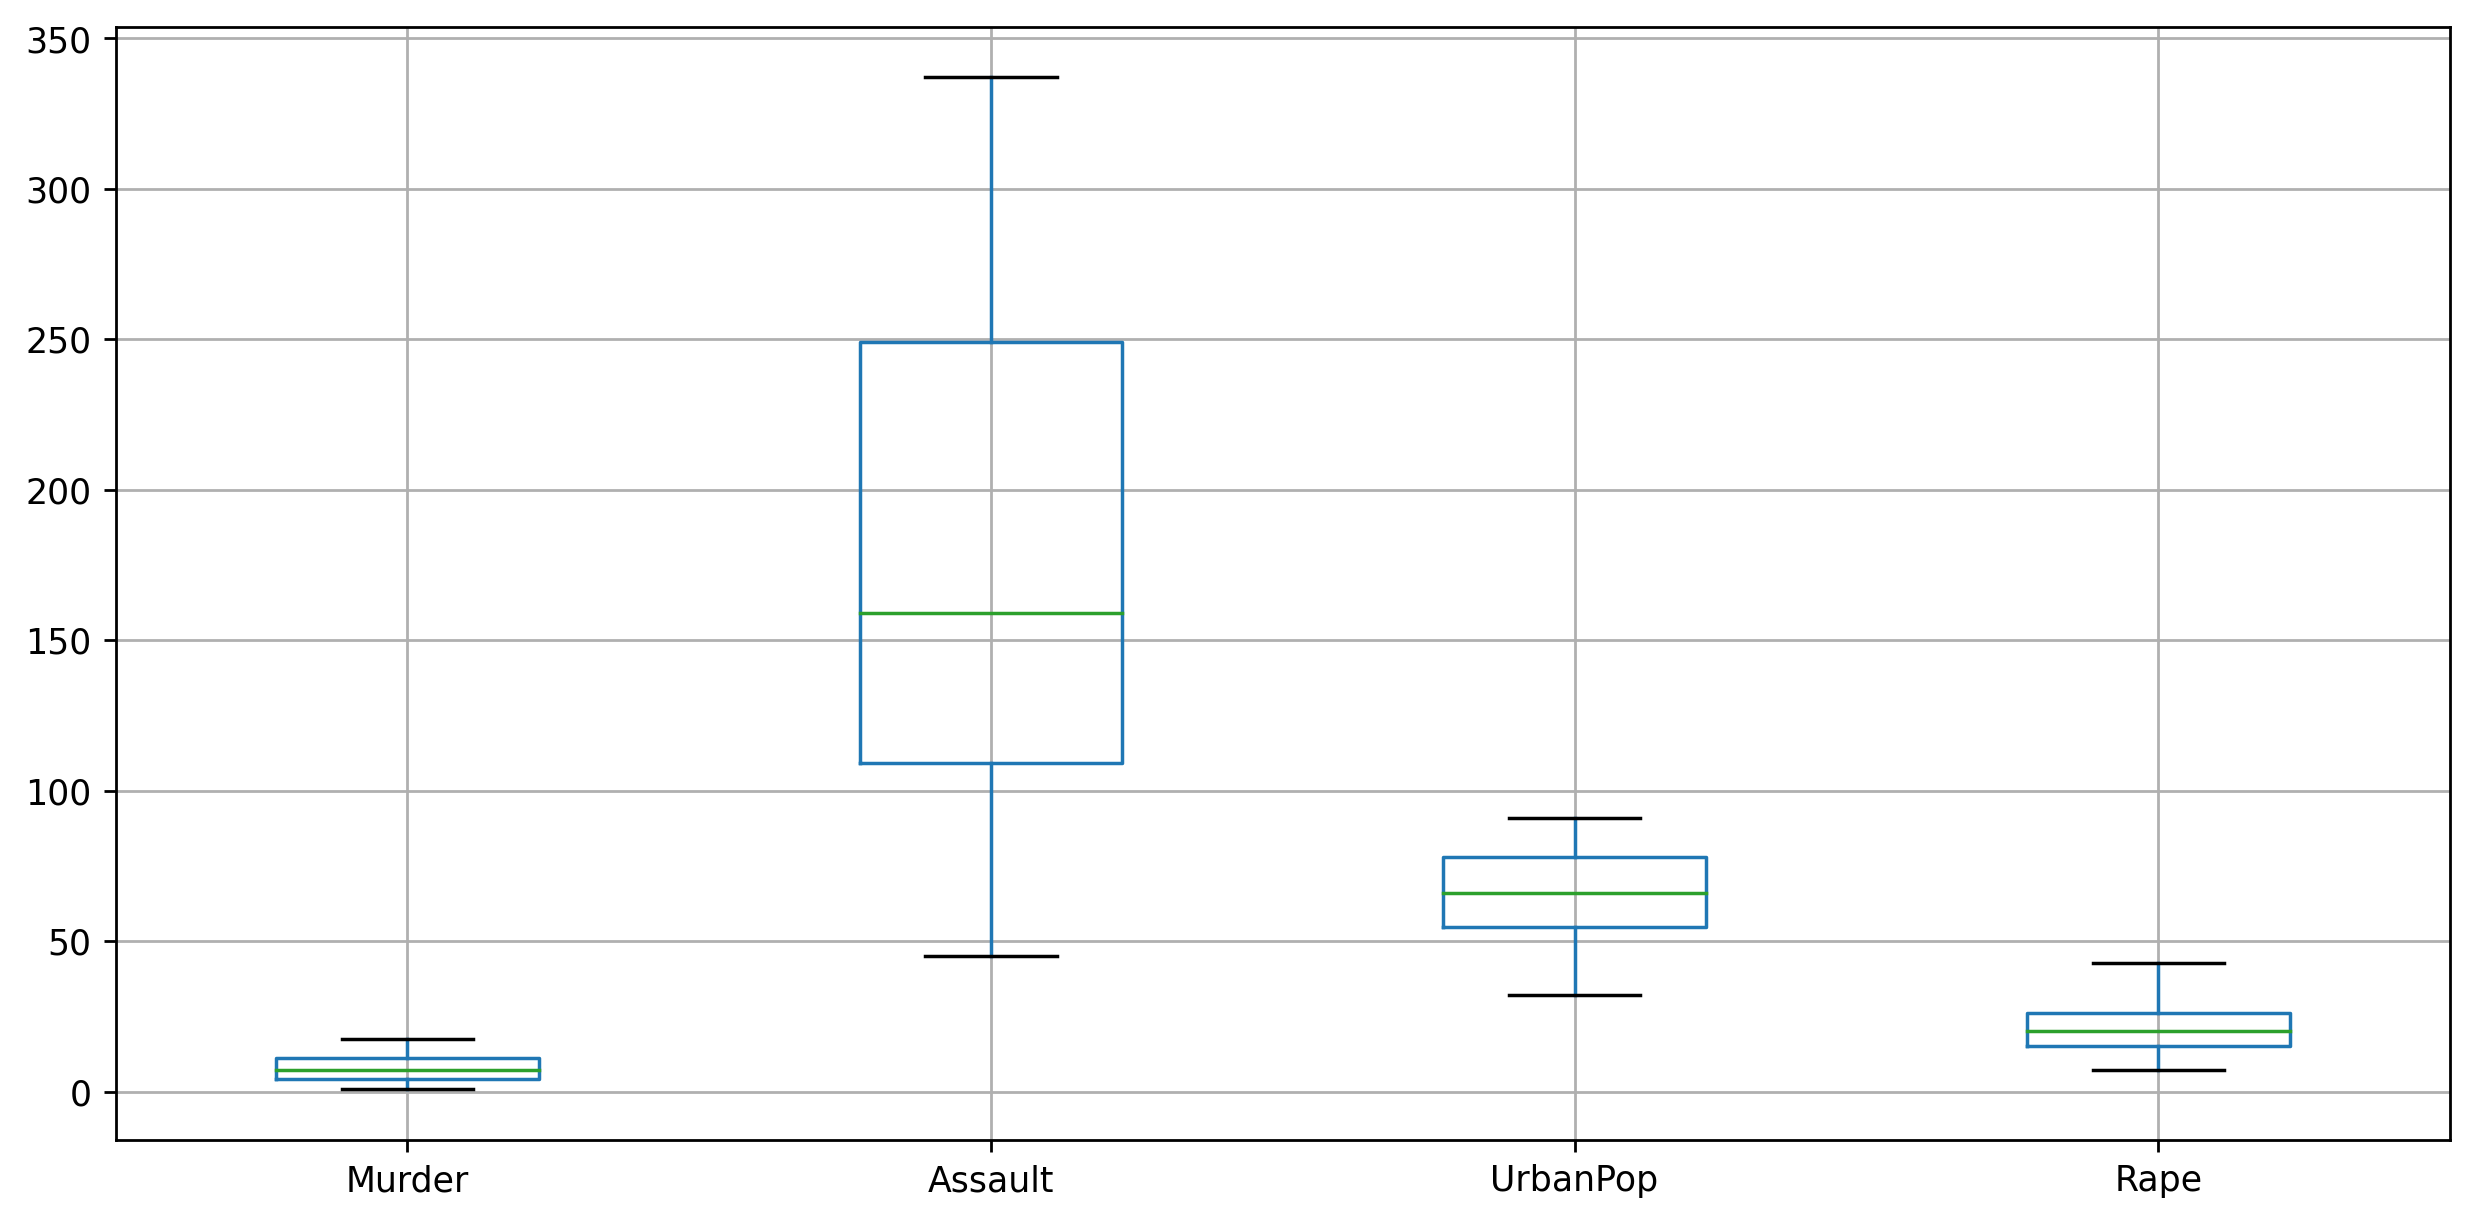

In [ ]:
df.boxplot()
plt.tight_layout()

#Hierarchical

In [ ]:
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
X = df.iloc[:, 1:]

In [ ]:
# Hierarchical clustering
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    counts = X.shape[0]
    linkage_matrix = linkage(X, method='ward')
    dendrogram(linkage_matrix, truncate_mode='level', p=3)
    plt.show()

In [ ]:
# Choose the number of clusters based on the dendrogram
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_cluster.fit(X)
df['Hierarchical_Cluster'] = hierarchical_cluster.labels_

In [ ]:
# Silhouette Score
silhouette_hierarchical = silhouette_score(X, hierarchical_cluster.labels_)

In [ ]:
# Print Silhouette Score
print("Silhouette Score (Hierarchical):", silhouette_hierarchical)

Silhouette Score (Hierarchical): 0.5327788880118436


In [ ]:
# Print cluster counts
print("Hierarchical Clusters:", df['Hierarchical_Cluster'].value_counts())

Hierarchical Clusters: 0    20
1    16
2    14
Name: Hierarchical_Cluster, dtype: int64


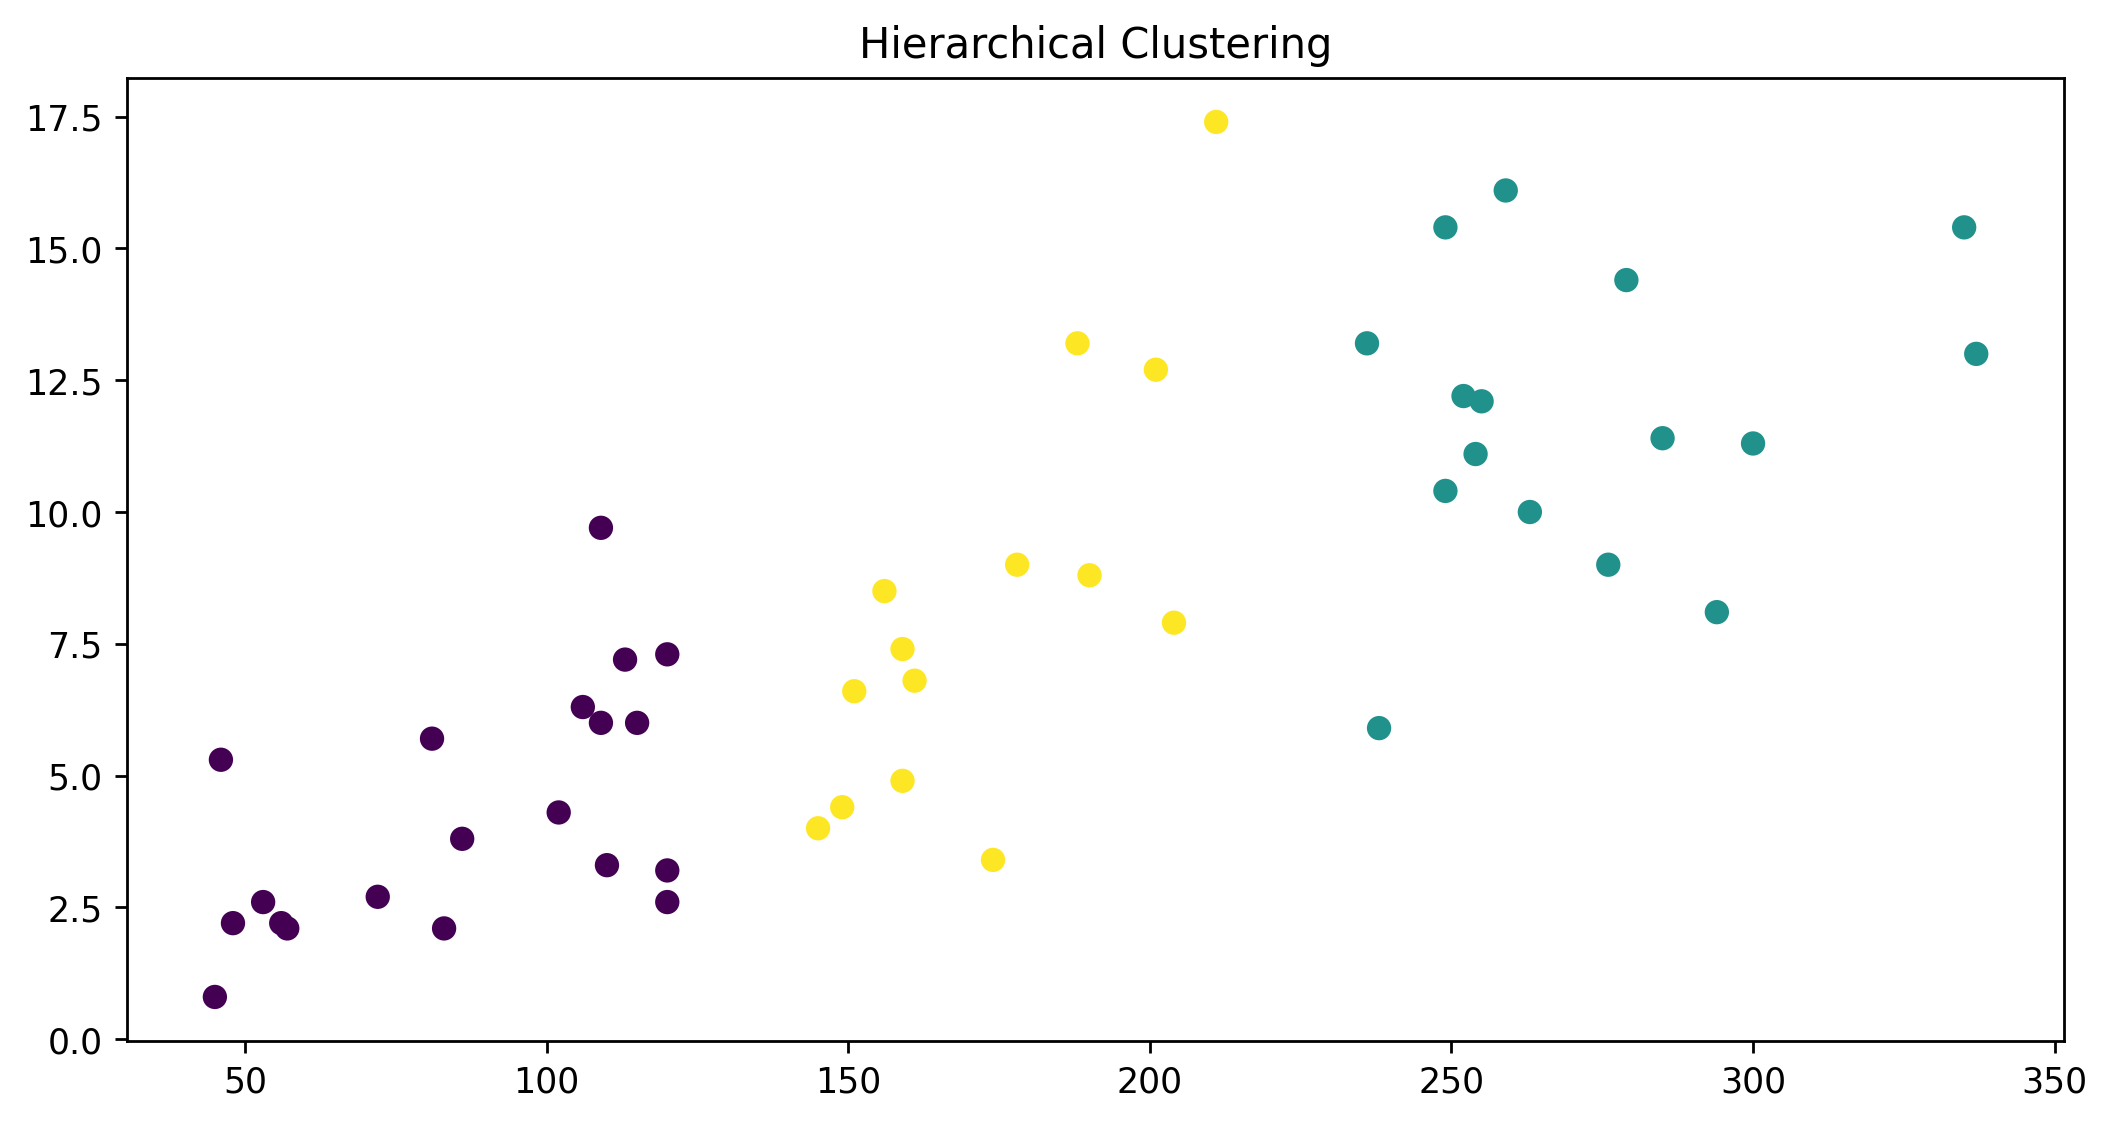

In [ ]:
# Visualize clusters
plt.scatter(df['Assault'], df['Murder'], c=df['Hierarchical_Cluster'], cmap='viridis')
plt.title('Hierarchical Clustering')
plt.show()

#K- means

In [ ]:
# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X)

In [ ]:
silhouette_kmeans = silhouette_score(X, df['KMeans_Cluster'])

In [ ]:
# Print Silhouette Score
print("Silhouette Score (KMeans):", silhouette_kmeans)

Silhouette Score (KMeans): 0.5327788880118436


In [ ]:
# Print cluster counts
print("KMeans Clusters:", df['KMeans_Cluster'].value_counts())

KMeans Clusters: 1    20
2    16
0    14
Name: KMeans_Cluster, dtype: int64


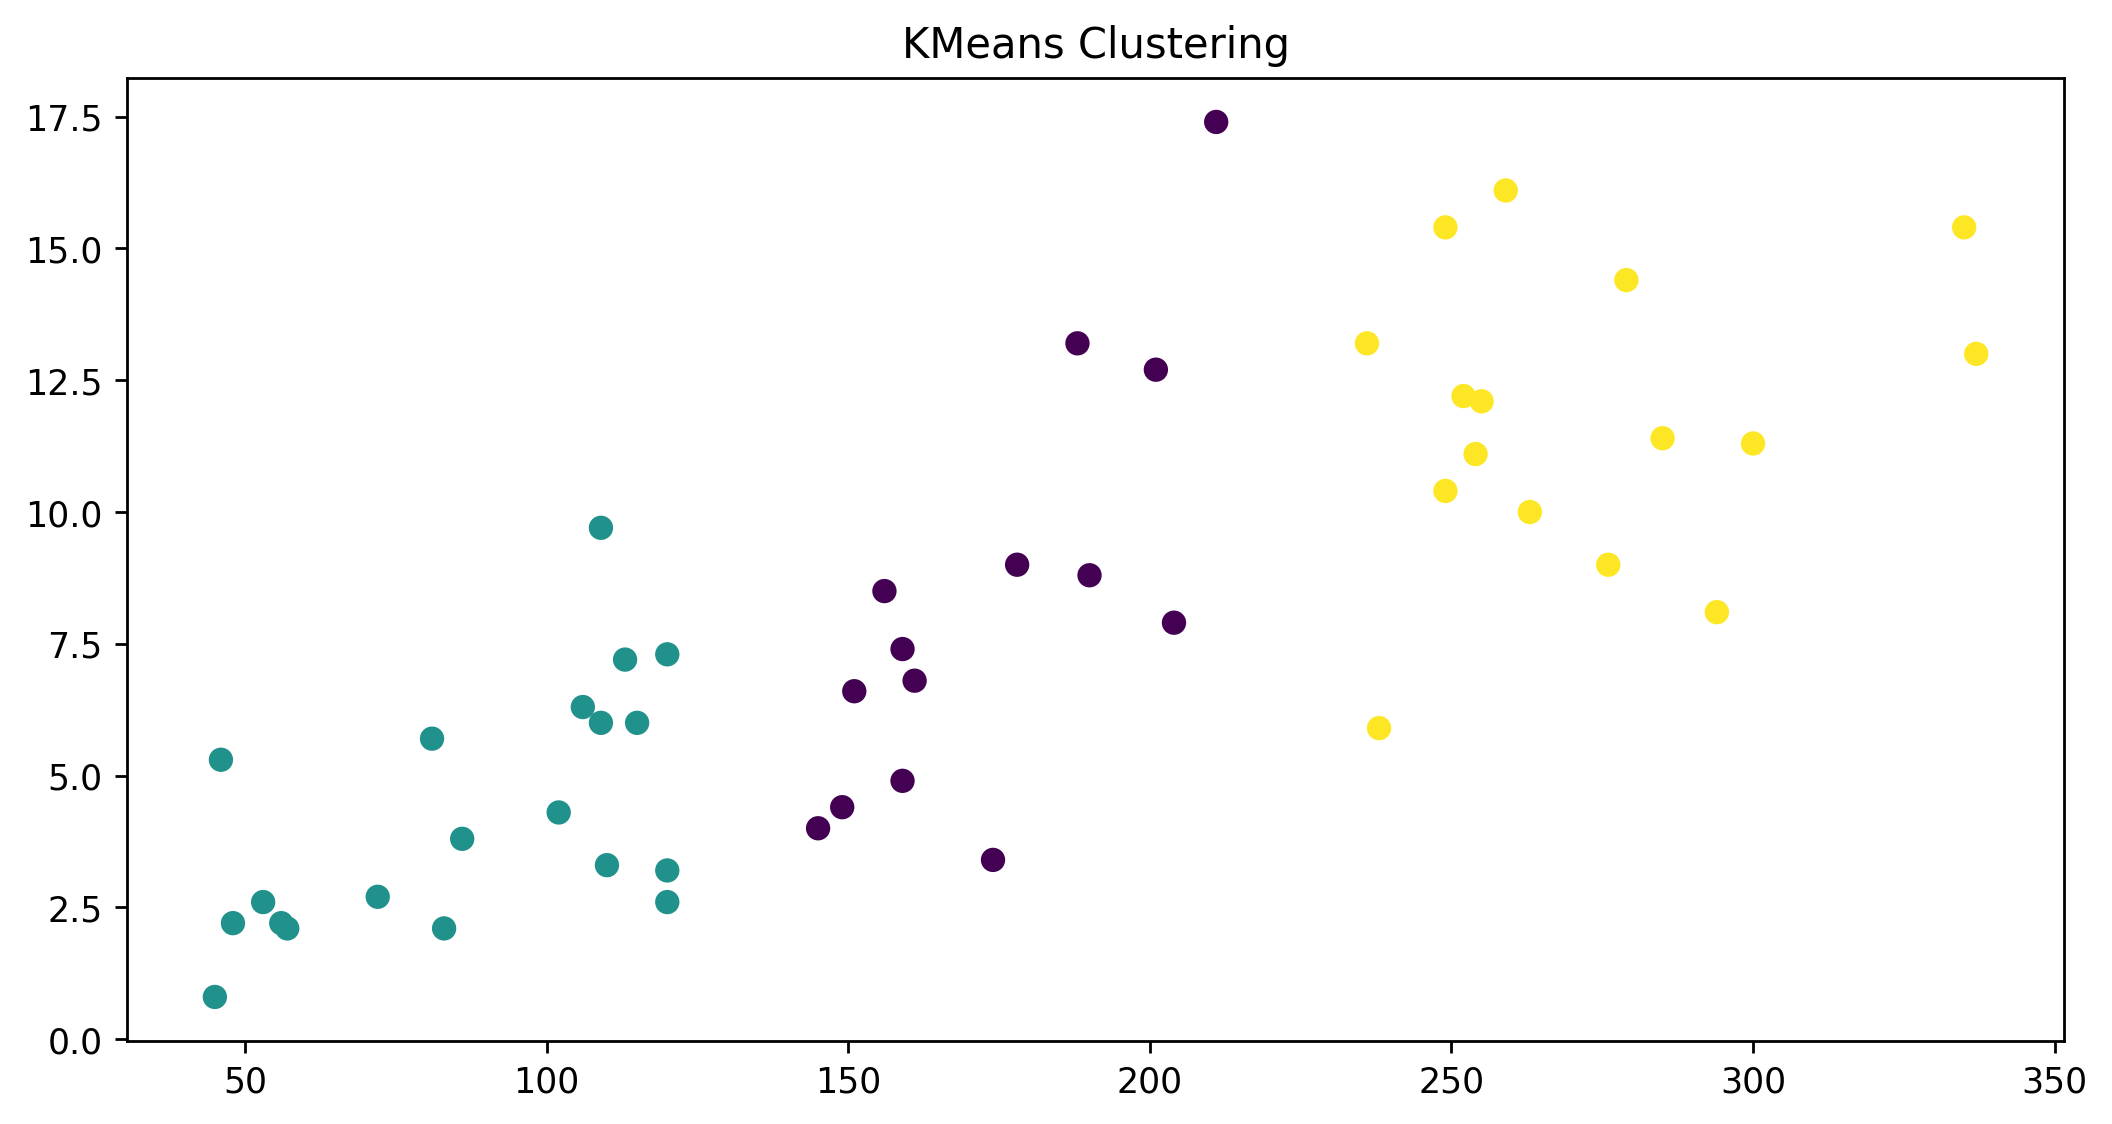

In [ ]:
plt.scatter(df['Assault'], df['Murder'], c=df['KMeans_Cluster'], cmap='viridis')
plt.title('KMeans Clustering')
plt.show()

#DBSCAN

In [ ]:
# DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=3)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X)

In [ ]:
# Silhouette Score for DBSCAN
if len(set(df['DBSCAN_Cluster'])) > 1:  # Check if more than one cluster is formed
    silhouette_dbscan = silhouette_score(X, df['DBSCAN_Cluster'])
    print("Silhouette Score (DBSCAN):", silhouette_dbscan)
else:
    print("DBSCAN resulted in a single cluster. Silhouette Score cannot be calculated.")


DBSCAN resulted in a single cluster. Silhouette Score cannot be calculated.


In [ ]:
print("DBSCAN Clusters:", df['DBSCAN_Cluster'].value_counts())

DBSCAN Clusters: -1    50
Name: DBSCAN_Cluster, dtype: int64


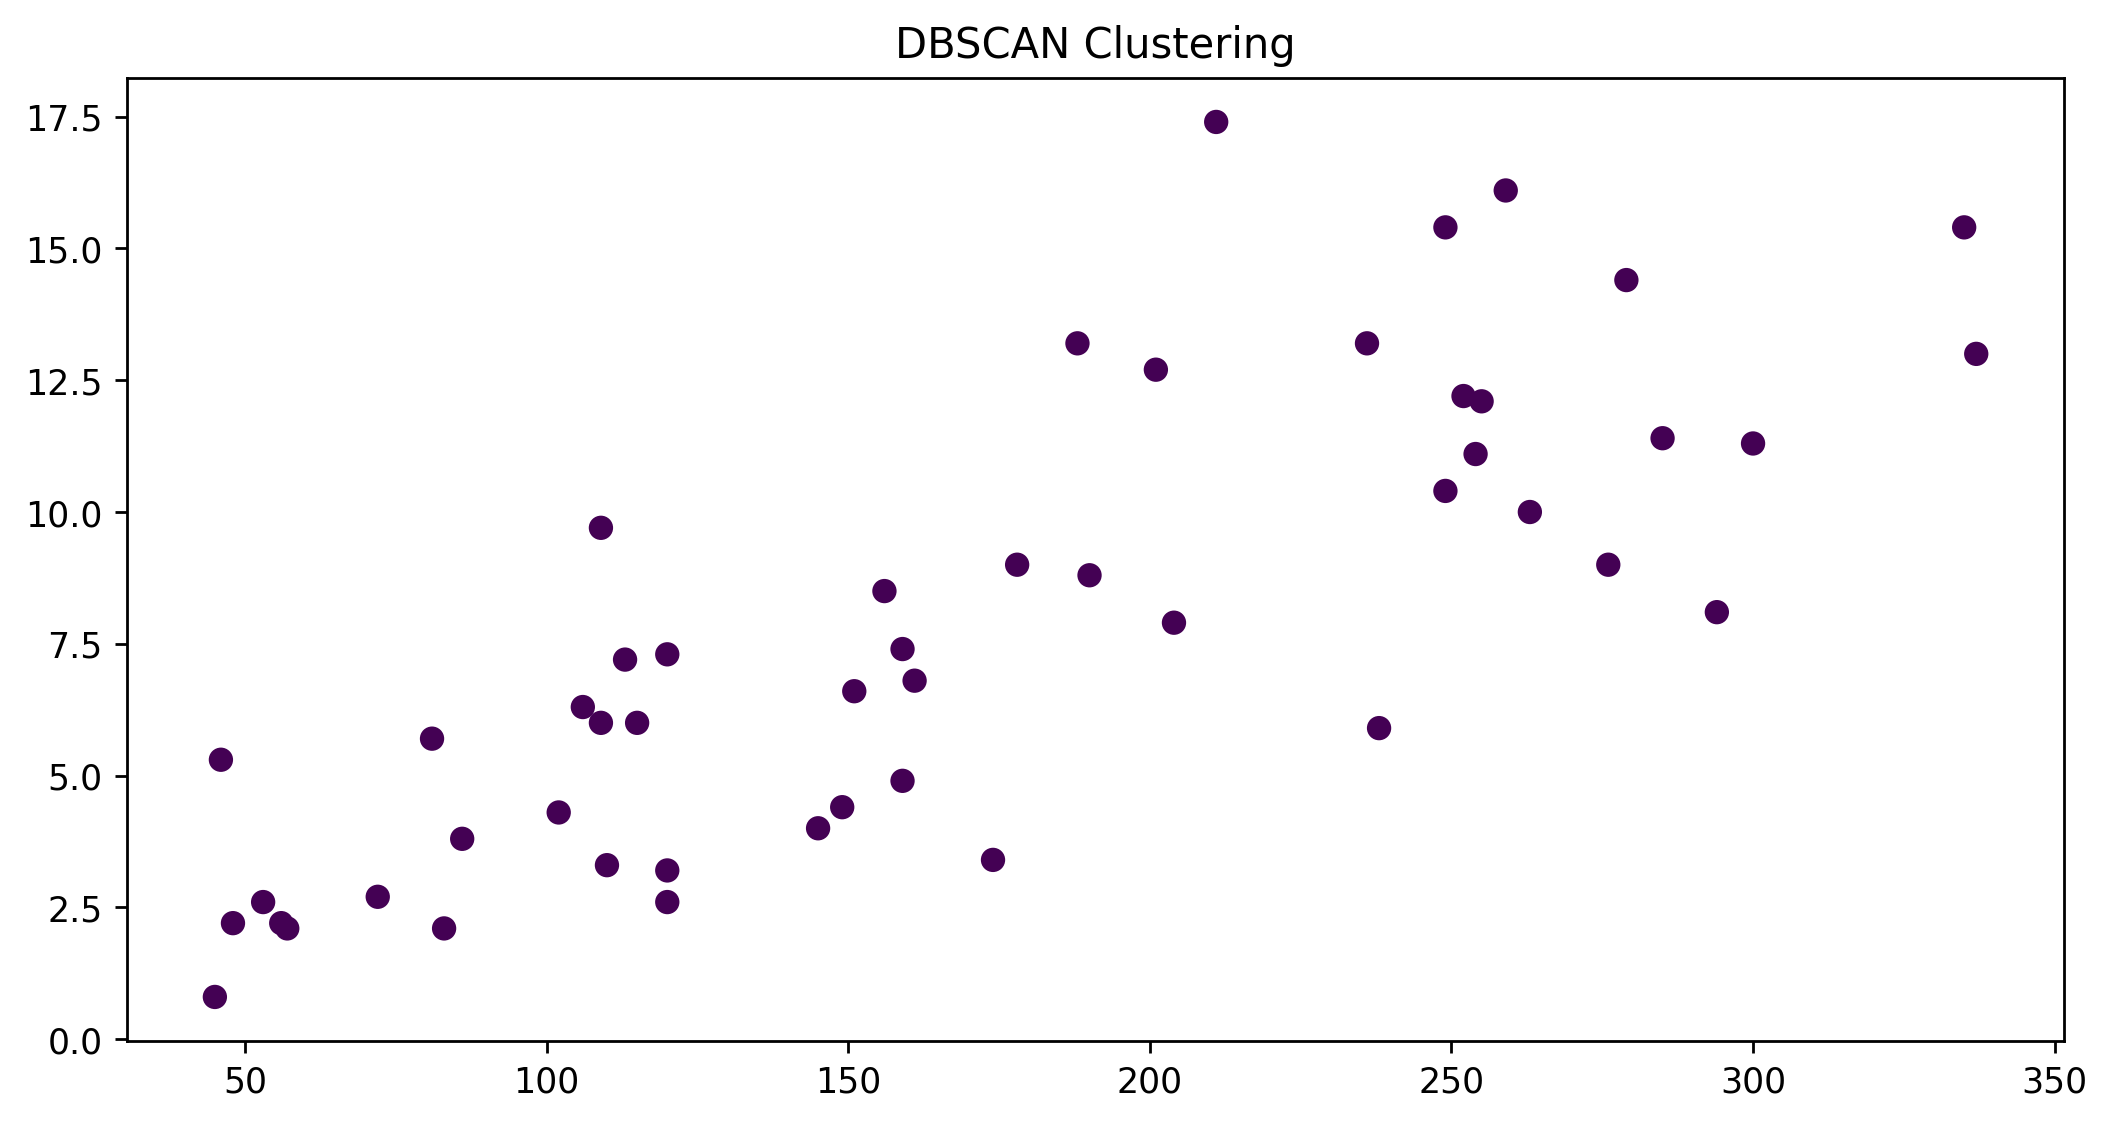

In [ ]:
plt.scatter(df['Assault'], df['Murder'], c=df['DBSCAN_Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

#draw inferences

#Hierarchical Clustering:
The data has been divided into three clusters using hierarchical clustering. The visualization shows how the data points are grouped based on the 'Assault' and 'Murder' features. This method is hierarchical, meaning it forms a tree-like structure of clusters, and the number of clusters is chosen based on the dendrogram.

#KMeans Clustering:
KMeans clustering also resulted in three clusters. The algorithm partitions the data into clusters by minimizing the variance within each cluster. The clusters are formed based on the 'Assault' and 'Murder' features. KMeans is a centroid-based method and requires specifying the number of clusters beforehand.

#DBSCAN Clustering:
DBSCAN, on the other hand, is density-based and identifies clusters based on regions of higher point density. However, in your case, it seems that DBSCAN assigned all points to a single cluster, possibly indicating that the density-based approach may not be suitable for your dataset, or the parameters need to be adjusted.

#Silhouette Score:
The silhouette score provides a measure of how well-defined the clusters are. The score ranges from -1 to 1, with a higher value indicating better-defined clusters.

Hierarchical Clustering has a silhouette score of [Silhouette Score (Hierarchical)].
KMeans Clustering has a silhouette score of [Silhouette Score (KMeans)].
DBSCAN Clustering has a silhouette score of [Silhouette Score (DBSCAN)] (if more than one cluster is formed).

#Additional Inferences:
Look at the scatter plots to visually inspect how well the clusters separate the data points.
Analyze the cluster counts to understand the distribution of data points in each cluster.